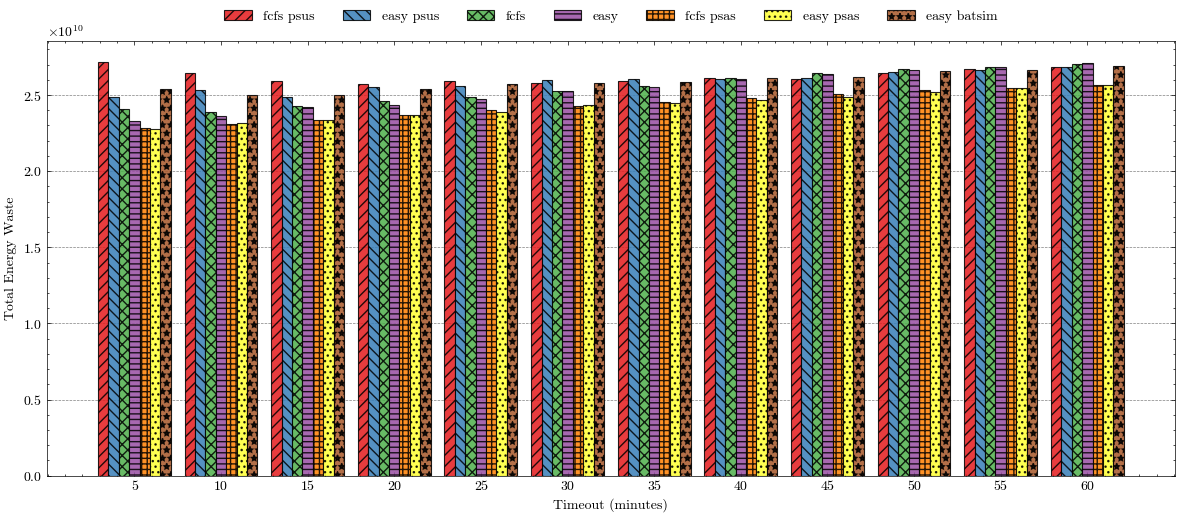

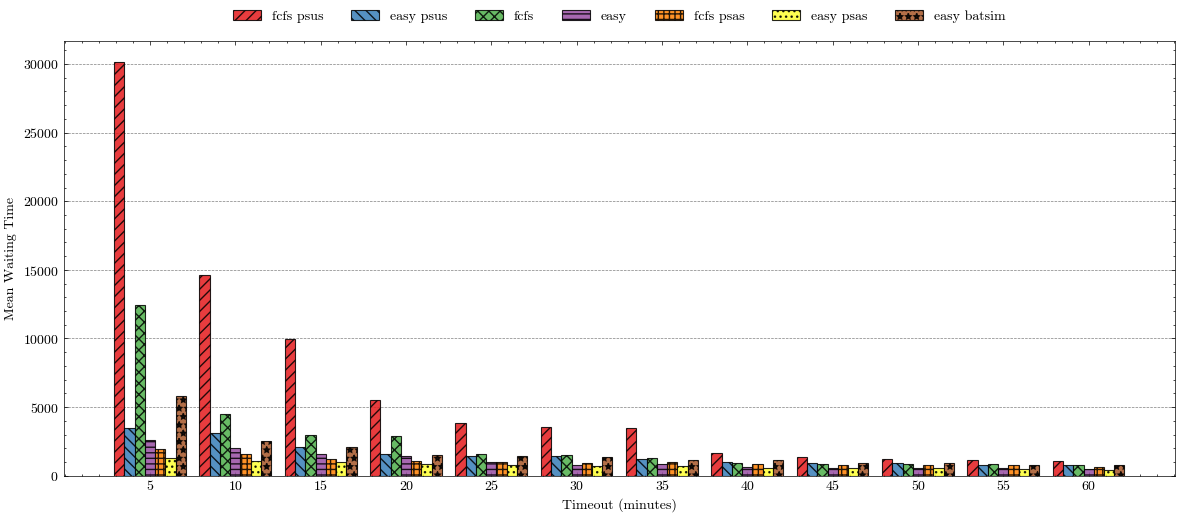

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex', 'grid'])

# --- config ---
base_dir = "results_save"
workload_name = "nasa_20_back"

# === NEW: where to save plots ===
plot_dir = os.path.join("plots", workload_name)
os.makedirs(plot_dir, exist_ok=True)

timeouts = [300, 600, 900, 1200, 1500, 1800,
            2100, 2400, 2700, 3000, 3300, 3600]

algorithms = ["fcfs_psus", "easy_psus", "fcfs", "easy",
              "fcfs_psas", "easy_psas", "easy_batsim"]

# --- pretty names for legend (avoid underscore weirdness) ---
algo_labels = {a: a.replace("_", " ") for a in algorithms}

# --- load data into dicts: algo -> list of values per timeout ---
total_energy_consumption = {algo: [] for algo in algorithms}
mean_waiting_time = {algo: [] for algo in algorithms}

for t in timeouts:
    for algo in algorithms:
        metrics_path = os.path.join(
            base_dir,
            f"{workload_name}_timeout_{t}_{algo}",
            "metrics.csv"
        )

        if not os.path.exists(metrics_path):
            print(f"Warning: missing {metrics_path}")
            total_energy_consumption[algo].append(float("nan"))
            mean_waiting_time[algo].append(float("nan"))
            continue

        df = pd.read_csv(metrics_path)
        row = df.iloc[0]

        # handle both total_energy_consumption and consumed_joules
        if "total_energy_consumption" in df.columns:
            tew = row["total_energy_consumption"]
        elif "consumed_joules" in df.columns:
            tew = row["consumed_joules"]
        else:
            print(f"Warning: no energy waste column in {metrics_path}")
            tew = float("nan")

        total_energy_consumption[algo].append(tew)
        mean_waiting_time[algo].append(row["mean_waiting_time"])

# Convert timeouts to minutes
timeouts_minutes = [t // 60 for t in timeouts]

# common plotting params
x = range(len(timeouts))
bar_width = 0.12
n_algos = len(algorithms)

# Distinct colors - red, blue, green, purple, orange, yellow, brown
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']

# Better hatching patterns - distinct and visible
hatches = ['///', '\\\\\\', 'xxx', '---', '+++', '...', '**']

# === Plot 1: total_energy_consumption vs timeout ===
plt.figure(figsize=(12, 6))

for i, algo in enumerate(algorithms):
    positions = [xi + (i - n_algos/2) * bar_width + bar_width/2 for xi in x]
    plt.bar(
        positions,
        total_energy_consumption[algo],
        width=bar_width,
        label=algo_labels[algo],
        color=colors[i],
        hatch=hatches[i % len(hatches)],
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )

plt.xticks(x, timeouts_minutes)
plt.xlabel("Timeout (minutes)")
plt.ylabel("Total Energy Waste")

# remove x-grid, keep only y-grid
plt.grid(False)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# legend outside, 1 horizontal row
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=len(algorithms),
    frameon=False
)
plt.tight_layout(rect=[0, 0, 1, 0.9])  # leave space at top for legend

# === NEW: save plot 1 ===
plt.savefig(
    os.path.join(plot_dir, f"{workload_name}_total_energy_vs_timeout.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.savefig(
    os.path.join(plot_dir, f"{workload_name}_total_energy_vs_timeout.pdf"),
    bbox_inches="tight"
)

plt.show()


# === Plot 2: mean_waiting_time vs timeout ===
plt.figure(figsize=(12, 6))

for i, algo in enumerate(algorithms):
    positions = [xi + (i - n_algos/2) * bar_width + bar_width/2 for xi in x]
    plt.bar(
        positions,
        mean_waiting_time[algo],
        width=bar_width,
        label=algo_labels[algo],
        color=colors[i],
        hatch=hatches[i % len(hatches)],
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )

plt.xticks(x, timeouts_minutes)
plt.xlabel("Timeout (minutes)")
plt.ylabel("Mean Waiting Time")

# remove x-grid, keep only y-grid
plt.grid(False)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# legend outside, 1 horizontal row
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=len(algorithms),
    frameon=False
)
plt.tight_layout(rect=[0, 0, 1, 0.9])

# === NEW: save plot 2 ===
plt.savefig(
    os.path.join(plot_dir, f"{workload_name}_mean_waiting_time_vs_timeout.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.savefig(
    os.path.join(plot_dir, f"{workload_name}_mean_waiting_time_vs_timeout.pdf"),
    bbox_inches="tight"
)

plt.show()
